1e-05
1.1111111111111112e-05
1.25e-05
1.4285714285714287e-05
1.6666666666666667e-05
2e-05
2.5e-05
3.3333333333333335e-05
5e-05
0.0001


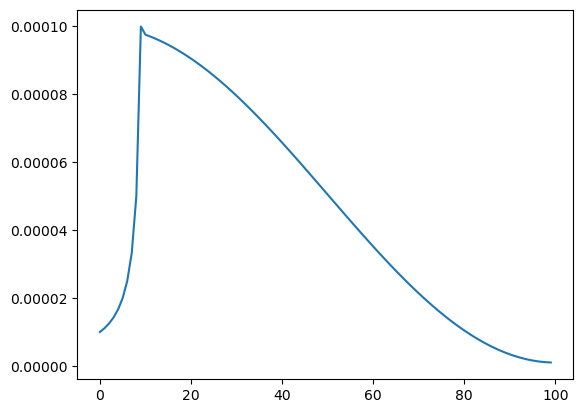

In [8]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from src.util import *

model = nn.Sequential(nn.Linear(1, 1), nn.Linear(1, 1))


# 学習率表示用
def lr_plot(optimizer,scheduler,lr):
    lrs = []
    optim = optimizer
    sche = scheduler
    for epoch in range(100):
        
        if epoch<10:
            _lr = create_lr(epoch,lr)
            print(_lr)
            optimizer = torch.optim.Adam(model.parameters(), _lr)
        else:
            optimizer = optim
            scheduller = sche

        optimizer.step()
        lrs.append(optimizer.param_groups[0]["lr"])
        scheduler.step()

    plt.plot(lrs)

lr = 1e-04
optimizer = torch.optim.Adam(model.parameters(), lr)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max=100,eta_min=lr*0.01)
lr_plot(optimizer,scheduler,lr)

In [ ]:
def cosine_scheduler(base_value, final_value, epochs, niter_per_ep, warmup_epochs=0,
                     start_warmup_value=0, warmup_steps=-1):
    warmup_schedule = np.array([])
    warmup_iters = warmup_epochs * niter_per_ep
    if warmup_steps > 0:
        warmup_iters = warmup_steps
    print("Set warmup steps = %d" % warmup_iters)
    if warmup_epochs > 0:
        warmup_schedule = np.linspace(start_warmup_value, base_value, warmup_iters)

    iters = np.arange(epochs * niter_per_ep - warmup_iters)
    schedule = np.array(
        [final_value + 0.5 * (base_value - final_value) * (1 + math.cos(math.pi * i / (len(iters)))) for i in iters])

    schedule = np.concatenate((warmup_schedule, schedule))

    assert len(schedule) == epochs * niter_per_ep
    return schedule